In [ ]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

# Pandas

In [ ]:
# Reading in data (from multiple sources)
df = pd.read_csv('pokemon_data.csv')
# df_xlsx = pd.read_excel('pokemon_data.xlsx')
df_txt = pd.read_csv('pokemon_data.txt', delimiter='\t')

# Sorting data
df_sorted = df.sort_values(['Generation', 'Name'])
print("Sorted Values:")

df_sorted.head(20)

In [ ]:
# Aggregate data
df['count'] = 1

df_aggregated = df.groupby(['Type 1', 'Type 2']).count()['count']

df_aggregated

In [ ]:
# Make changes to data (including conditional changes)
df_data_change = df

# Pick specific rows and/or columns
df_data_change['Total'] = df['HP'] + df['Attack'] + df['Defense'] + df['Sp. Atk'] + df['Sp. Def'] + df['Speed']
print(df_data_change.drop(columns=['Name', '#', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'count']))

# More concise way to do it
print("\n More concise notation:")
df.iloc[3:16, 4:10].sum(axis=1)

In [ ]:
# Filter data
df_filter = df.loc[(df['Total'] > 500) & (df['Legendary']), ['Name', 'Generation','Legendary']]

df_filter

In [ ]:
# Save dataframe to a new file
df_filter.to_csv('filtered.csv')

# Numpy

In [ ]:
# Creating an array

# From a file
filedata = np.genfromtxt('npdata.txt', delimiter=',')

# From scratch (several ways)
a = np.array([[9.0,8.0,7.0],[6.0,5.0,4.0]]) # Hardcoded

zeros = np.zeros((2,3)) # Full of zeroes

ninety_nine = np.full((2,2), 99) # Full of any number

rands = np.random.rand(4,2) # Full of random numbers (between 0 and 1)

identity = np.identity(5) # The identity matrix

rands

In [ ]:
# Checking properties of numpy arrays

print("Dimension of a: " + str(a.ndim))
print("Shape of zeros: " + str(zeros.shape))
print("Data type of ninety_nine: " + str(ninety_nine.dtype))
print("Size of identity: " + str(identity.size) + "\n\n")

# Checking stats of numpy arrays

print("Min of a: " + str(np.min(a)))
print("Max of a: " + str(np.max(a)))
print("Sum of ninety_nine: " + str(np.sum(ninety_nine)))
print("Mean of rands: " + str(np.mean(rands)))
print("Std dev of rands: " + str(np.std(rands)))


In [ ]:
# Changing values
b = np.array([[1,2,3,4,5,6,7],[8,9,10,11,12,13,14]])

b[1, 5]
b[0,:]
b[:,1]
b[0, 1:-1:2] # [startindex:endindex:stepsize]

In [ ]:
# Reshaping arrays
print("Before:")
before = np.array([[1,2],[3,4],[5,6]])
print(before)

print("\nAfter:")
after = before.reshape((2,3))
print(after)

# Stacking arrays vertically
print("\nVertical Stacks:")

v1 = np.array([1,2,3,4])
v2 = np.array([5,6,7,8])

print(np.vstack([v1,v2,v1,v2]))

# Stacking arrays horizontally
print("\nHorizontal Stacks:")

h1 = np.ones((2,4))
h2 = np.zeros((2,2))

print(np.hstack((h1,h2)))

In [ ]:
# Math (include time save)
c = np.array([1,2,3,4])

In [ ]:
c + 2

In [ ]:
c - 2

In [ ]:
c ** 2

In [ ]:
np.cos(c)

In [ ]:
import time
d = np.random.rand(1000,1000)

# Gross way (with timing)
start = time.time()

for item in d:
    d += item

end = time.time()
print(end - start)

# Numpy way (with timing)
start = time.time()

np.sum(d)

end = time.time()
print(end - start)

In [ ]:
# You can also do lin alg (won't show here)

# Matplotlib

In [ ]:
# Loading a dataset for plotting purposes
fifa = pd.read_csv('fifa_data.csv')

# Checking out the dataset
fifa.head(5)

In [ ]:
# Showing the distributions of soccer player quality

bins = [40,50,60,70,80,90,100]

# Specifying plot dimensions
plt.figure(figsize=(8,5))

# Specify that this is a histogram
plt.hist(fifa.Overall, bins=bins, color='#abcdef')

# Random additions to make the plot prettier
plt.xticks(bins)
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

# Save the figure as a png
# plt.savefig('histogram.png', dpi=300)

# Show the plot
plt.show()

In [ ]:
# Some pandas data preprocessing stuff
left = fifa.loc[fifa['Preferred Foot'] == 'Left'].count()[0]
right = fifa.loc[fifa['Preferred Foot'] == 'Right'].count()[0]

# Set figure size
plt.figure(figsize=(8,5))

# Create nice formatting things
labels = ['Left', 'Right']
colors = ['#abcdef', '#aabbcc']

# Specify that this is a pie chart
plt.pie([left, right], labels = labels, colors=colors, autopct='%.2f %%')

# Set the title
plt.title('Foot Preference of FIFA Players')

# Show the plot
plt.show()

In [ ]:
# Your turn! What kind of plot will this output? What kind of plot is it and what is it plotting?

plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')

fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()


In [ ]:
# Round two!

plt.figure(figsize=(5,8), dpi=100)

plt.style.use('default')

barcelona = fifa.loc[fifa.Club == "FC Barcelona"]['Overall']
madrid = fifa.loc[fifa.Club == "Real Madrid"]['Overall']
revs = fifa.loc[fifa.Club == "Toronto FC"]['Overall']

#bp = plt.boxplot([barcelona, madrid, revs], labels=['a','b','c'], boxprops=dict(facecolor='red'))
bp = plt.boxplot([barcelona, madrid, revs], labels=['FC Barcelona','Real Madrid','Toronto FC'], patch_artist=True, medianprops={'linewidth': 2})

plt.title('Professional Soccer Team Comparison')
plt.ylabel('FIFA Overall Rating')

for box in bp['boxes']:
    # change outline color
    box.set(color='#4286f4', linewidth=2)
    # change fill color
    box.set(facecolor = '#e0e0e0' )
    # change hatch
    #box.set(hatch = '/')
    
plt.show()

# Sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

In [ ]:
# Importing data
train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_train.csv')

y_train = train["label"]
X_train = train.drop(["label"],axis = 1)
X_test = test

X = X/255.0
X_test = X_test/255.0

In [ ]:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True, figsize=(10,6))
axs = axs.flatten()
for i in range(0,5):
    im = X.iloc[i]
    im = im.values.reshape(-1,28,28,1)
    axs[i].imshow(im[0,:,:,0], cmap=plt.get_cmap('gray'))
    axs[i].set_title(y[i])
plt.tight_layout()    

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

plt.hist(y)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

percp = Perceptron(random_state=0)
clf.fit(X_train,y_train)
print(clf.score(X, y))

logreg = LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)
print(logreg.score(X, y))

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print(knn.score(X, y))

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print(rfc.score(X, y))

svm = SVC()
svm.fit(X_train,y_train)
print(svm.score(X, y))
# pred_val_perc = GridCV_Perceptron.predict(X_test)
# plot_confusion_matrix(y_test, pred_val_perc)

# Tensorflow

In [2]:
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D
from keras.layers import AvgPool2D, BatchNormalization, Reshape
# from keras.optimizers import Adadelta, RMSprop, Adam
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

import tensorflow as tf

## Dense Neural Net with 1 hidden layer

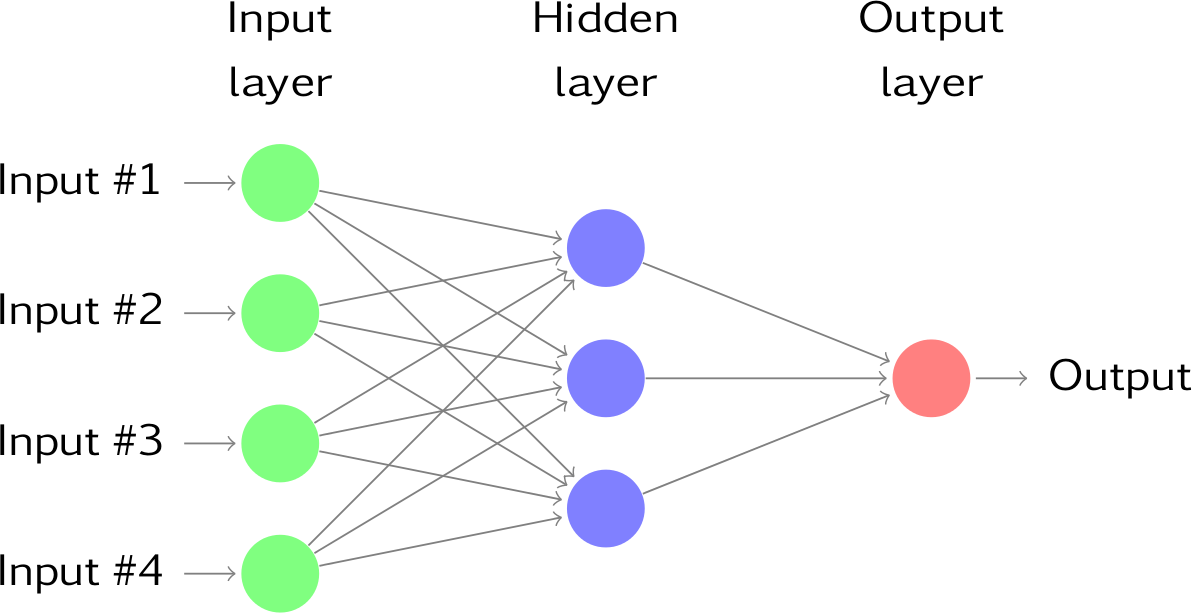

In [ ]:
model1 = Sequential()
model1.add(Dense(100, input_dim=784, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Dense NN with 3 hidden layers

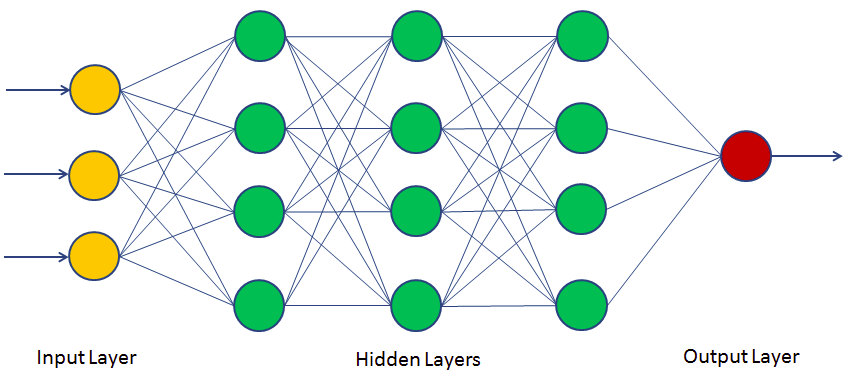

In [ ]:
model2 = Sequential()  
model2.add(Dense(100, activation='relu', input_dim=784))
model2.add(Dense(200, activation='relu')) 
model2.add(Dense(100, activation='relu')) 
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Convolutional Neural Net

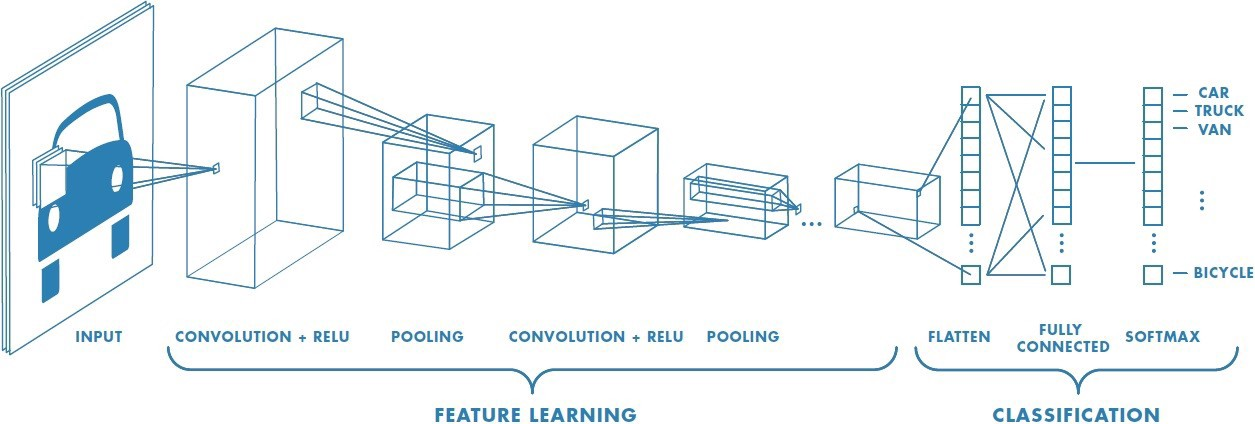

In [ ]:
model3 = Sequential()
    
model3.add(Conv2D(32, kernel_size=(3, 3), activation=activation, input_shape=input_shape)) 

model3.add(Conv2D(64, (3, 3), activation=activation))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(128, activation=activation))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

model3.compile(loss=loss, optimizer=adadelta, metrics=['accuracy'])

# References

https://www.kaggle.com/dejavu23/mnist-sklearn-and-keras#Part-2-:-Sklearn-Classifiers
https://github.com/KeithGalli/NumPy/blob/master/NumPy%20Tutorial.ipynb
https://github.com/KeithGalli/pandas/blob/master/Pandas%20Data%20Science%20Tutorial.ipynb
https://github.com/KeithGalli/matplotlib_tutorial/blob/master/Matplotlib%20Tutorial.ipynb